In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier,VotingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix

import pickle

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [5]:
train.shape,test.shape

((165034, 14), (110023, 13))

### Data Preprocessing

In [6]:
data=train.merge(test,how='outer')

In [7]:
data

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0.0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0.0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0.0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0.0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275052,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62,NaN
275053,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68,NaN
275054,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38,NaN
275055,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58,NaN


<Axes: >

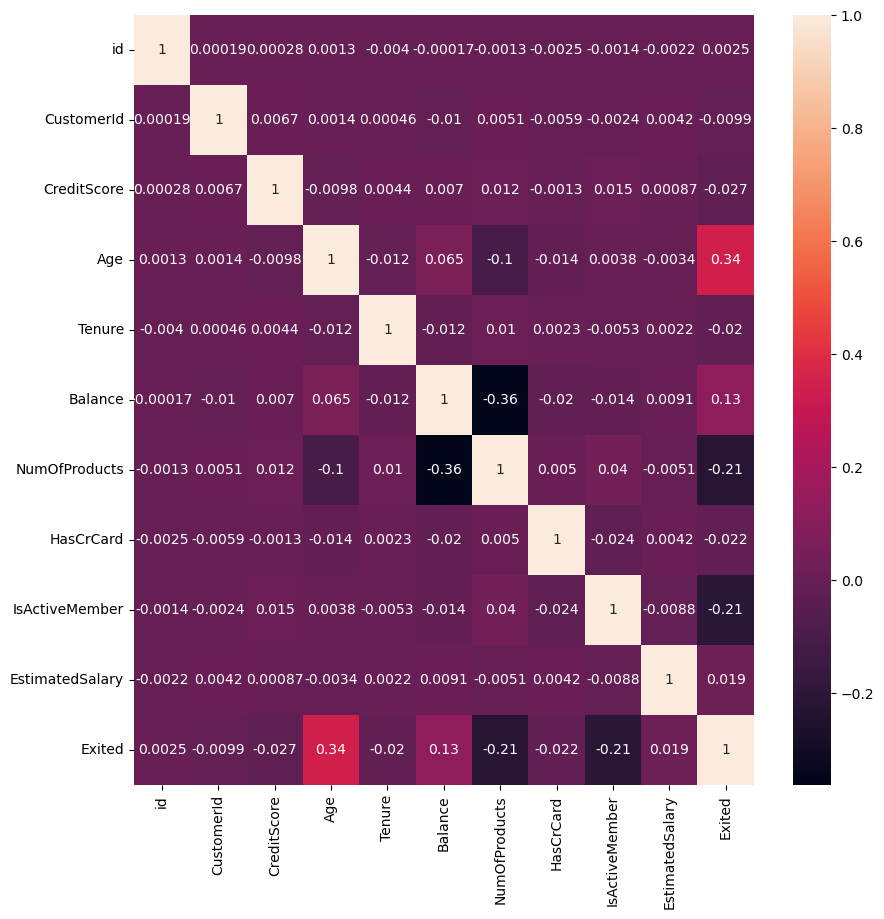

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap((data.select_dtypes(include=np.number)).corr(),annot=True)

In [9]:
data.isnull().sum()

id                      0
CustomerId              0
Surname                 0
CreditScore             0
Geography               0
Gender                  0
Age                     0
Tenure                  0
Balance                 0
NumOfProducts           0
HasCrCard               0
IsActiveMember          0
EstimatedSalary         0
Exited             110023
dtype: int64

#### Let's remove sum unnecessary columns

In [10]:
data.drop(columns=['id'],inplace=True)

In [11]:
data.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275057 entries, 0 to 275056
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       275057 non-null  int64  
 1   Surname          275057 non-null  object 
 2   CreditScore      275057 non-null  int64  
 3   Geography        275057 non-null  object 
 4   Gender           275057 non-null  object 
 5   Age              275057 non-null  float64
 6   Tenure           275057 non-null  int64  
 7   Balance          275057 non-null  float64
 8   NumOfProducts    275057 non-null  int64  
 9   HasCrCard        275057 non-null  float64
 10  IsActiveMember   275057 non-null  float64
 11  EstimatedSalary  275057 non-null  float64
 12  Exited           165034 non-null  float64
dtypes: float64(6), int64(4), object(3)
memory usage: 27.3+ MB


#### Let's encode categorical columns

In [13]:
data['Geography'].value_counts()

Geography
France     157386
Spain       60126
Germany     57545
Name: count, dtype: int64

In [14]:
data['Gender'].value_counts()

Gender
Male      155092
Female    119965
Name: count, dtype: int64

In [15]:
data=pd.get_dummies(data,drop_first=True,dtype=int)

In [16]:
data

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,15674932,668,33.0,3,0.00,2,1.0,0.0,181449.97,0.0,...,0,0,0,0,0,0,0,0,0,1
1,15749177,627,33.0,1,0.00,2,1.0,1.0,49503.50,0.0,...,0,0,0,0,0,0,0,0,0,1
2,15694510,678,40.0,10,0.00,2,1.0,0.0,184866.69,0.0,...,0,0,0,0,0,0,0,0,0,1
3,15741417,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0.0,...,0,0,0,0,0,0,0,0,0,1
4,15766172,716,33.0,5,0.00,2,1.0,1.0,15068.83,0.0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275052,15662091,570,29.0,7,116099.82,1,1.0,1.0,148087.62,NaN,...,0,0,0,0,0,0,0,0,1,1
275053,15774133,575,36.0,4,178032.53,1,1.0,1.0,42181.68,NaN,...,0,0,0,0,0,0,0,0,0,0
275054,15728456,712,31.0,2,0.00,2,1.0,0.0,16287.38,NaN,...,0,0,0,0,0,0,0,0,0,1
275055,15687541,709,32.0,3,0.00,1,1.0,1.0,158816.58,NaN,...,0,0,0,0,0,0,0,0,0,0


In [17]:
data.dtypes

CustomerId             int64
CreditScore            int64
Age                  float64
Tenure                 int64
Balance              float64
                      ...   
Surname_Zuyev          int64
Surname_Zuyeva         int64
Geography_Germany      int64
Geography_Spain        int64
Gender_Male            int64
Length: 2901, dtype: object

### Split the data

In [18]:
train_data=data[data['Exited'].notnull()]
pred_data=data[data['Exited'].isnull()]

In [19]:
train_data.shape

(165034, 2901)

In [20]:
pred_data.shape

(110023, 2901)

In [21]:
x=train_data.drop(columns=['Exited'])
y=train_data['Exited']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=2,stratify=y)

In [24]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((132027, 2900), (33007, 2900), (132027,), (33007,))

In [25]:
def model_validation(model,trainx,trainy,testx,testy):
    m = model
    m.fit(trainx,trainy)
    y_pred = m.predict(testx)
    print('Confusion Matrix:\n',confusion_matrix(testy,y_pred))
    print('Classification Report\n', classification_report(testy,y_pred))
    prob=m.predict_proba(testx)[:,1]
    print('Roc AUC\n', roc_auc_score(testy,prob))
    
    ans=input('Do you want to save this model y/n:')
    if ans.lower()=='y':
        with open('final_model.pkl','wb') as file:
            pickle.dump(m,file)
        print('Model has been save')
    else:
        print('Not save')

#### Naive Baye's

In [214]:
model_validation(GaussianNB(),x_train,y_train,x_test,y_test)

Confusion Matrix:
 [[24848  1175]
 [ 5625  1359]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.82      0.95      0.88     26023
         1.0       0.54      0.19      0.29      6984

    accuracy                           0.79     33007
   macro avg       0.68      0.57      0.58     33007
weighted avg       0.76      0.79      0.75     33007

Roc AUC
 0.7658872780352599
Do you want to save this model y/n:n
Not save


#### KNN

In [215]:
from sklearn.neighbors import KNeighborsClassifier

In [216]:
model_validation(KNeighborsClassifier(n_neighbors=3),x_train,y_train,x_test,y_test)

Confusion Matrix:
 [[23245  2778]
 [ 5895  1089]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.80      0.89      0.84     26023
         1.0       0.28      0.16      0.20      6984

    accuracy                           0.74     33007
   macro avg       0.54      0.52      0.52     33007
weighted avg       0.69      0.74      0.71     33007

Roc AUC
 0.5638169825010293
Do you want to save this model y/n:n
Not save


#### Gradient Boosting Classifier

In [ ]:
model_validation(GradientBoostingClassifier(n_estimators=400,max_depth=5),x_train,y_train,x_test,y_test)

#### Decision Tree Classifier

In [218]:
from sklearn.tree import DecisionTreeClassifier

In [219]:
model_validation(DecisionTreeClassifier(max_depth=5),x_train,y_train,x_test,y_test)

Confusion Matrix:
 [[24825  1198]
 [ 3653  3331]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     26023
         1.0       0.74      0.48      0.58      6984

    accuracy                           0.85     33007
   macro avg       0.80      0.72      0.74     33007
weighted avg       0.84      0.85      0.84     33007

Roc AUC
 0.8653025719075984
Do you want to save this model y/n:n
Not save


#### Random Forest Classifier

In [220]:
model_validation(RandomForestClassifier(n_estimators=200,max_depth=7),x_train,y_train,x_test,y_test)

Confusion Matrix:
 [[25079   944]
 [ 3687  3297]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.87      0.96      0.92     26023
         1.0       0.78      0.47      0.59      6984

    accuracy                           0.86     33007
   macro avg       0.82      0.72      0.75     33007
weighted avg       0.85      0.86      0.85     33007

Roc AUC
 0.8831938706173176
Do you want to save this model y/n:n
Not save


#### XGB

In [221]:
model_validation(XGBClassifier(n_estimators=150,gamma=2),x_train,y_train,x_test,y_test)

Confusion Matrix:
 [[24636  1387]
 [ 3130  3854]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.89      0.95      0.92     26023
         1.0       0.74      0.55      0.63      6984

    accuracy                           0.86     33007
   macro avg       0.81      0.75      0.77     33007
weighted avg       0.86      0.86      0.86     33007

Roc AUC
 0.8866857344100265
Do you want to save this model y/n:n
Not save


#### Stacking Classifier

In [106]:
base_estimators = [('Cat Boost',CatBoostClassifier(iterations=1685, depth=6, learning_rate=0.1, loss_function='Logloss',verbose=0)),
                   ('XGB',XGBClassifier(n_estimators=150,gamma=2)),
                   ('Gradiant',GradientBoostingClassifier(n_estimators=200,max_depth=4))]

In [ ]:
model_validation(StackingClassifier(estimators=base_estimators,\
                                    final_estimator=(RandomForestClassifier(n_estimators=200,max_depth=4))),\
                                    x_train,y_train,x_test,y_test)

#### Cat Boost

In [26]:
import catboost
from catboost import CatBoostClassifier

In [27]:
model_validation(CatBoostClassifier(iterations=1685, depth=6, learning_rate=0.1, loss_function='Logloss',verbose=0)\
                 ,x_train,y_train,x_test,y_test)

Confusion Matrix:
 [[24692  1331]
 [ 3109  3875]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.89      0.95      0.92     26023
         1.0       0.74      0.55      0.64      6984

    accuracy                           0.87     33007
   macro avg       0.82      0.75      0.78     33007
weighted avg       0.86      0.87      0.86     33007

Roc AUC
 0.8906995365893394
Do you want to save this model y/n:
Not save


In [28]:
# iterations=1685,depth=6 - 0.8906995365893394

### Predictions

In [29]:
with open('final_model.pkl','rb') as file:
    final_model=pickle.load(file)

In [30]:
submission=pd.read_csv('sample_submission.csv')

In [31]:
submission['Exited']=final_model.predict_proba(pred_data.drop(columns=['Exited']))[:,1]

In [32]:
submission.to_csv

<bound method NDFrame.to_csv of             id    Exited
0       165034  0.019081
1       165035  0.829079
2       165036  0.021485
3       165037  0.212251
4       165038  0.595000
...        ...       ...
110018  275052  0.025414
110019  275053  0.111000
110020  275054  0.010735
110021  275055  0.141185
110022  275056  0.146777

[110023 rows x 2 columns]>

In [33]:
submission.to_csv('final_submission.csv',index=False)